In [46]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
!pip install numpy==1.23.5


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [33 lines of output]
      Traceback (most recent call last):
        File "C:\Users\Vishnu\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "C:\Users\Vishnu\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\Vishnu\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 112, in get_requires_for_build_wheel
          backend = _build_backend()
                    ^^^^^^^^^^^^^^^^
        File "C:\Users\Vishnu\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 77, in _build_backend
          obj = impo


     ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
     --------------------------------------- 0.0/10.7 MB 435.7 kB/s eta 0:00:25
     --------------------------------------- 0.1/10.7 MB 812.7 kB/s eta 0:00:14
      --------------------------------------- 0.3/10.7 MB 2.0 MB/s eta 0:00:06
     - -------------------------------------- 0.3/10.7 MB 2.0 MB/s eta 0:00:06
     -- ------------------------------------- 0.6/10.7 MB 2.7 MB/s eta 0:00:04
     --- ------------------------------------ 0.9/10.7 MB 3.4 MB/s eta 0:00:03
     --- ------------------------------------ 1.0/10.7 MB 3.2 MB/s eta 0:00:04
     ---- ----------------------------------- 1.3/10.7 MB 4.0 MB/s eta 0:00:03
     ------ --------------------------------- 1.6/10.7 MB 4.3 MB/s eta 0:00:03
     ------- -------------------------------- 2.0/10.7 MB 4.7 MB/s eta 0:00:02
     -------- ------------------------------- 2.3/10.7 MB 5.0 MB/s eta 0:00:02
     ---------- ----------------------------- 2.7/10.7 M

In [2]:
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

In [2]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization , Flatten ,Dense , AveragePooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import os
import glob

import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sn

In [3]:
def load_data_train_part(image_dir, test_size=0.2 ):
    data = []
    labels = []
    class_dirs = [d for d in os.listdir(image_dir) if os.path.isdir(os.path.join(image_dir, d))]

    for class_dir in class_dirs:
        class_label = class_dir
        image_files = glob.glob(os.path.join(image_dir, class_dir, "*.png"))  # adjust as necessary
        data.extend(image_files)
        labels.extend([class_label]*len(image_files))


    # Further split the train data into train and validation sets
    train_files, val_files, train_labels, val_labels = train_test_split(data, labels,
                                                                        test_size=test_size,
                                                                        stratify=labels)
    return train_files, train_labels, val_files, val_labels

In [4]:
train_files, train_labels, val_files, val_labels = \
load_data_train_part(image_dir = r'D:/vishnu/disease outbreak/train/train')


In [5]:
import os
#print(os.listdir('/content/drive/MyDrive/test'))


In [6]:

def load_data_test_part(image_dir):
    data = []
    labels = []
    class_dirs = [d for d in os.listdir(image_dir) if os.path.isdir(os.path.join(image_dir, d))]

    for class_dir in class_dirs:
        class_label = class_dir
        image_files = glob.glob(os.path.join(image_dir, class_dir, "*.png"))  # adjust as necessary
        data.extend(image_files)
        labels.extend([class_label]*len(image_files))

    # Create a DataFrame with the image paths and labels
    df_test_part = pd.DataFrame({
        'filename': data,
        'class': labels
    })

    test_files = list( df_test_part.iloc[ : , 0] ) # return first column of the df_test_part as a list (file names)
    test_labels =list( df_test_part.iloc[ : , 1] ) # return second column of the df_test_part as a list(class labels)

    return test_files , test_labels

In [7]:
test_files, test_labels = \
load_data_test_part(image_dir= r'D:/vishnu/disease outbreak/test/test')

In [8]:
if not test_labels:
    raise ValueError("test_labels is empty. Please check the test dataset path or image files.")


In [9]:
# Convert labels to one-hot encodings
label_encoder = LabelEncoder()
label_encoder.fit(train_labels)  # Assuming train_labels is your list of training labels

# One-hot encode your labels
train_labels_enc = to_categorical(label_encoder.transform(train_labels))
val_labels_enc = to_categorical(label_encoder.transform(val_labels))
test_labels_enc = to_categorical(label_encoder.transform(test_labels))

In [10]:
class_names = label_encoder.classes_
class_numbers = label_encoder.transform(label_encoder.classes_)


In [11]:
#This function selects and displays 5 photos randomly from the address of the files.
#The link of these photos should be inside a list.

def show_sample_images(image_files, labels, num_samples=5):
    if len(image_files) < num_samples:
        print("Not enough images to show")
        return

    sample_indices = random.sample(range(len(image_files)), num_samples)
    sample_files = [image_files[i] for i in sample_indices]
    sample_labels = [labels[i] for i in sample_indices]

    fig, axes = plt.subplots(1, num_samples, figsize=(20, 10))
    for i, (file, label) in enumerate(zip(sample_files, sample_labels)):
        img = mpimg.imread(file)
        axes[i].imshow(img, cmap='gray')  # For grayscale images, use cmap='gray' and for rbg pictures use None.
        axes[i].axis('off')
        axes[i].set_title(f"{label}\n{os.path.basename(file)}", fontsize=18)
    plt.tight_layout()
    plt.show()

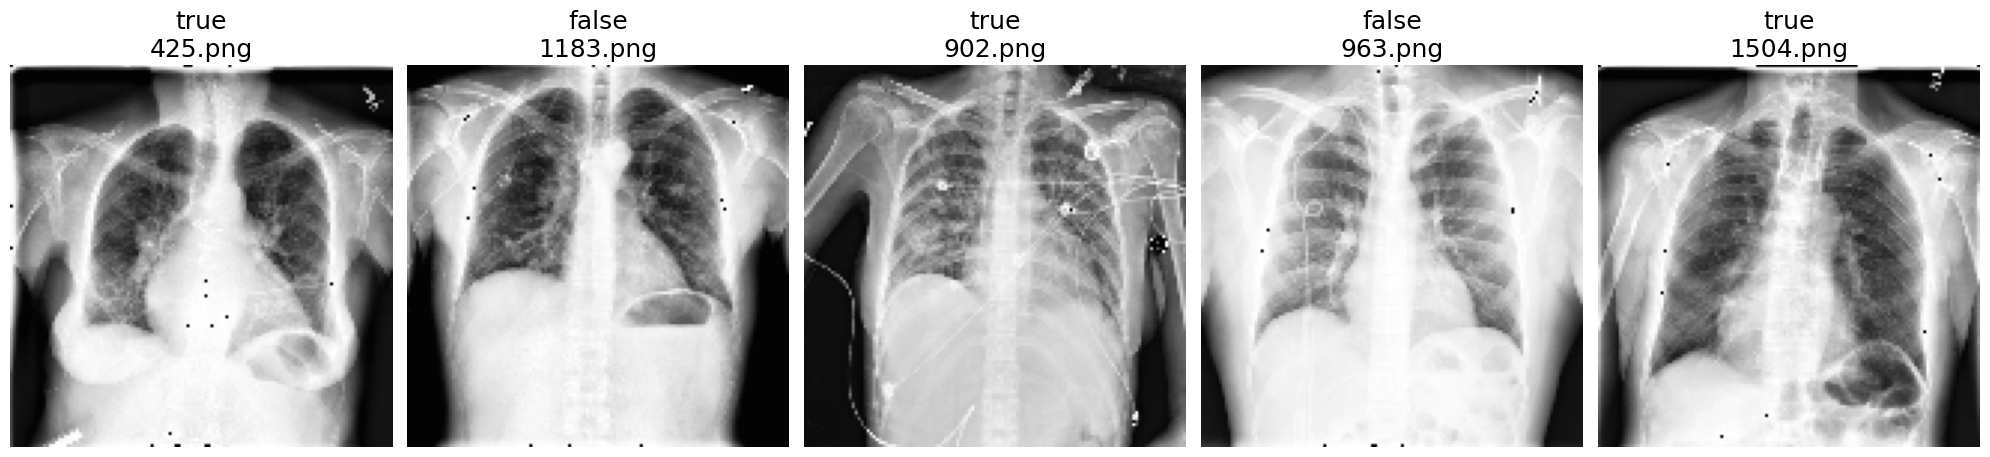

In [12]:
# I use train files and labels
show_sample_images(train_files,train_labels)

In [13]:
import matplotlib.pyplot as plt
from itertools import cycle
import cv2
from skimage.feature import graycomatrix, graycoprops


In [19]:
def extract_features(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (256, 256))  # Standardizing size
    edges = cv2.Canny(image, 50, 150)  # Edge detection
    
    # GLCM Texture Features
    glcm = graycomatrix(image, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    dissimilarity = graycoprops(glcm, 'dissimilarity')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]
    correlation = graycoprops(glcm, 'correlation')[0, 0]
    
    features = np.array([
        np.mean(image), np.std(image), np.mean(edges), np.std(edges),
        contrast, dissimilarity, homogeneity, energy, correlation
    ])
    return features

# Example usage
sample_image = 'D:/vishnu/disease outbreak/test/test/false/2.png'
if os.path.exists(sample_image):
    extracted_features = extract_features(sample_image)
    print("Extracted Features:", extracted_features)
else:
    print("Sample X-ray image not found.")

Extracted Features: [1.69693008e+02 7.14020441e+01 2.20113373e+01 7.16127924e+01
 6.07976869e+01 4.41377145e+00 3.19935781e-01 3.16963502e-02
 9.94020013e-01]


In [13]:
def convert_images_to_array(image_files):
    images = []
    for file in image_files:
        # Load each image and convert to a NumPy array
        image = load_img(file, target_size=(128, 128))  # Adjust target_size as necessary and use that same size later
        image_array = img_to_array(image)
        images.append(image_array)

    return np.array(images)

In [14]:
train_array = convert_images_to_array(train_files)
val_array = convert_images_to_array(val_files)
test_array= convert_images_to_array(test_files)

In [54]:
train_datagen = ImageDataGenerator(rescale=1./255 , featurewise_center=True ,
#     rotation_range=10,  # Randomly rotate images in the range (degrees, 0 to 180)
#     width_shift_range=0.1,  # Randomly horizontal shift images
#     height_shift_range=0.1,  # Randomly vertical shift images
#     horizontal_flip=True,  # Randomly flip images horizontally
#     vertical_flip=True  # Usually not used for natural images
)

val_datagen = ImageDataGenerator(rescale=1./255   , featurewise_center=True)
test_datagen = ImageDataGenerator(rescale=1./255  , featurewise_center=True)

In [55]:
train_datagen.fit(train_array)

# Transfer the feature-wise properties to the val and test data generators
#This code now ensures that the same mean used for the training data
# is applied to the validation and test data for feature-wise centering.

val_datagen.mean = train_datagen.mean
test_datagen.mean = train_datagen.mean

In [56]:
# Setup the generators
train_generator = train_datagen.flow(
    x=train_array,
    y=train_labels_enc,  # accourding to Convert labels to one-hot encodings part
    batch_size=64,
    shuffle=True
)

val_generator = val_datagen.flow(
    x=val_array,  # Assuming val_array is a numpy array of your validation images
    y=val_labels_enc,
    batch_size=64,
    shuffle=False
)

test_generator = test_datagen.flow(
    x=test_array,  # Assuming test_array is a numpy array of your test images
    y=test_labels_enc,
    batch_size=64,
    shuffle=False
)

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

cnn_4 = Sequential()

cnn_4.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)))
cnn_4.add(MaxPooling2D(pool_size=2, strides=2))

cnn_4.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
cnn_4.add(MaxPooling2D(pool_size=2, strides=2))

cnn_4.add(Flatten())

cnn_4.add(Dense(256, activation='relu'))
cnn_4.add(Dense(2, activation='softmax'))

cnn_4.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │    16,777,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,797,378 (64.08 MB)

 Trainable params: 16,797,378 (64.08 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
# Define the EarlyStopping callback to monitor the validation accuracy
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Monitoring validation accuracy
    patience=12,  # Number of epochs with no improvement after which training will be stopped
    verbose=1,
    mode='max',  # Stops training when the quantity monitored has stopped increasing
    restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored quantity
)

# Compile the model
cnn_4.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Fit the model without saving the best model
history = cnn_4.fit(
    x=train_generator,
    validation_data=val_generator,
    epochs=35,
    callbacks=[early_stopping]  # Only EarlyStopping, no ModelCheckpoint
)


Epoch 1/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 201ms/step - accuracy: 0.5459 - loss: 0.9896 - val_accuracy: 0.6227 - val_loss: 0.6629
Epoch 2/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 25s 453ms/step - accuracy: 0.6407 - loss: 0.6483 - val_accuracy: 0.5912 - val_loss: 0.6647
Epoch 3/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 33s 591ms/step - accuracy: 0.6474 - loss: 0.6251 - val_accuracy: 0.6655 - val_loss: 0.6044
Epoch 4/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 31s 552ms/step - accuracy: 0.7271 - loss: 0.5290 - val_accuracy: 0.6734 - val_loss: 0.6030
Epoch 5/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 31s 552ms/step - accuracy: 0.7574 - loss: 0.4818 - val_accuracy: 0.6791 - val_loss: 0.6057
Epoch 6/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 27s 485ms/step - accuracy: 0.8434 - loss: 0.3709 - val_accuracy: 0.6700 - val_loss: 0.6499
Epoch 7/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 196ms/step - accuracy: 0.8769 - loss: 0.2920 - val_accuracy: 0.6847 - val_loss: 0.7382
Epoch 8/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 229ms/step - accuracy: 0.9379 - loss: 0.1821 - val_accu

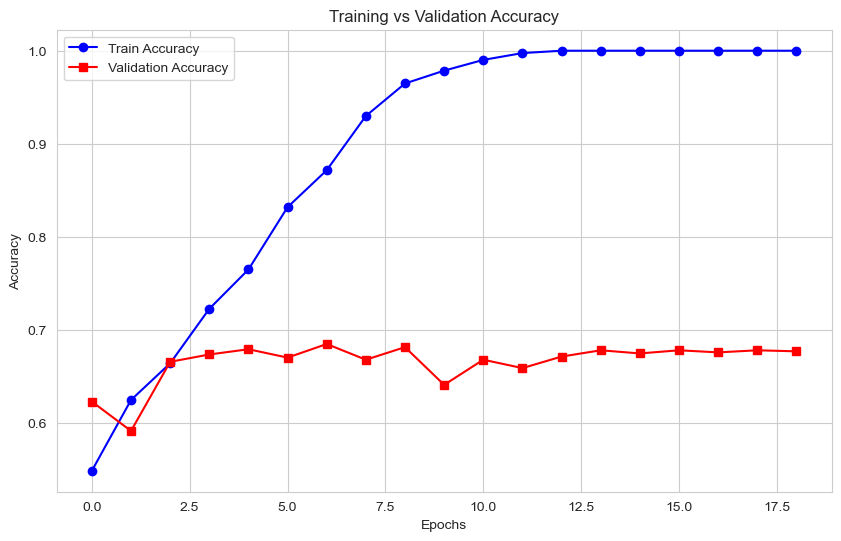

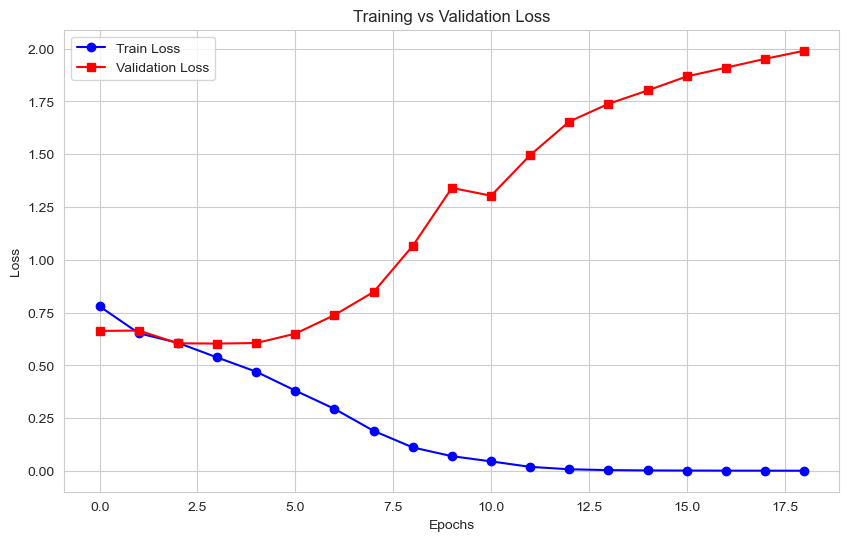

In [59]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

# Plot Loss
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Train Loss', color='blue', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


In [68]:
# Evaluate the model on training, validation, and test data
train_loss, train_accuracy = cnn_4.evaluate(train_generator)
val_loss, val_accuracy = cnn_4.evaluate(val_generator)
test_loss, test_accuracy = cnn_4.evaluate(test_generator)

# Print the report
print("📊 **Model Performance Report**")
print("="*40)
print(f"🟢 Train Loss: {train_loss:.4f}")
print(f"🟢 Train Accuracy: {train_accuracy:.4%}")
print("-"*40)
print(f"🔵 Validation Loss: {val_loss:.4f}")
print(f"🔵 Validation Accuracy: {val_accuracy:.4%}")
print("-"*40)
print(f"🔴 Test Loss: {test_loss:.4f}")
print(f"🔴 Test Accuracy: {test_accuracy:.4%}")
print("="*40)


56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9457 - loss: 0.1918
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6857 - loss: 0.7545
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.6674 - loss: 0.6861
📊 **Model Performance Report**
🟢 Train Loss: 0.1938
🟢 Train Accuracy: 93.9155%
----------------------------------------
🔵 Validation Loss: 0.7382
🔵 Validation Accuracy: 68.4685%
----------------------------------------
🔴 Test Loss: 0.6781
🔴 Test Accuracy: 68.2226%


In [70]:
# Assuming best_model is your trained Keras model

# Get the predicted labels from the model
y_pred = cnn_4.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=-1)

# Convert one-hot encoded true labels back to class indices
y_true = np.argmax(test_labels_enc, axis=-1)

# Compute confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_classes)

print("Confusion Matrix:")
print(conf_mat)

# Get the class labels from the LabelEncoder
class_labels = label_encoder.classes_

# Compute classification report
report = classification_report(y_true, y_pred_classes, target_names=class_labels)

print("\nClassification Report:")
print(report)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
Confusion Matrix:
[[365 192]
 [162 395]]

Classification Report:
              precision    recall  f1-score   support

       false       0.69      0.66      0.67       557
        true       0.67      0.71      0.69       557

    accuracy                           0.68      1114
   macro avg       0.68      0.68      0.68      1114
weighted avg       0.68      0.68      0.68      1114



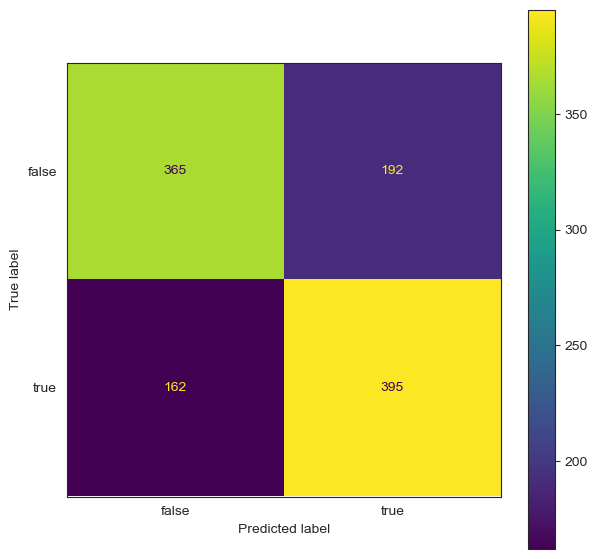

In [71]:
#Confusion matrix

sn.set_style("white")
def plot_confusion_matrix(conf_mat, classes):
    """
    This function prints and plots the confusion matrix.
    """
    fig, ax = plt.subplots(figsize=(7,7)) # change the plot size
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=classes)
    disp = disp.plot(include_values=True,cmap='viridis', ax=ax, xticks_rotation='horizontal')
    plt.show()

# Get your confusion matrix
conf_mat = conf_mat

# Using label_encoder.classes_ guarantees that class_names matches
# the order that was used during the one-hot encoding process
class_names = label_encoder.classes_

# Now plot using the function
plot_confusion_matrix(conf_mat, class_names)

In [21]:
cnn_8 = Sequential()

cnn_8.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)))
cnn_8.add(BatchNormalization())
cnn_8.add(MaxPooling2D(pool_size=2, strides=2))
cnn_8.add(Dropout(0.3))

cnn_8.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
cnn_8.add(BatchNormalization())
cnn_8.add(MaxPooling2D(pool_size=2, strides=2))
cnn_8.add(Dropout(0.3))

cnn_8.add(Flatten())

cnn_8.add(Dense(512, activation='relu'))
cnn_8.add(BatchNormalization())
cnn_8.add(Dense(256, activation='relu'))
cnn_8.add(BatchNormalization())
cnn_8.add(Dense(2, activation='softmax'))

cnn_8.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,709,634 (128.59 MB)

 Trainable params: 33,707,906 (128.59 MB)

 Non-trainable params: 1,728 (6.75 KB)

In [22]:
# Define the EarlyStopping callback to monitor the validation accuracy
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Monitoring validation accuracy
    patience=12,  # Number of epochs with no improvement after which training will be stopped
    verbose=1,
    mode='max',  # Stops training when the quantity monitored has stopped increasing
    restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored quantity
)

# Compile the model
cnn_8.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Fit the model without saving the best model
history = cnn_8.fit(
    x=train_generator,
    validation_data=val_generator,
    epochs=35,
    callbacks=[early_stopping]  # Only EarlyStopping, no ModelCheckpoint
)


Epoch 1/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 34s 546ms/step - accuracy: 0.5831 - loss: 0.7851 - val_accuracy: 0.5023 - val_loss: 1.0569
Epoch 2/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 32s 577ms/step - accuracy: 0.7090 - loss: 0.5509 - val_accuracy: 0.5000 - val_loss: 3.2903
Epoch 3/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 27s 479ms/step - accuracy: 0.7859 - loss: 0.4493 - val_accuracy: 0.5011 - val_loss: 3.3801
Epoch 4/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 30s 531ms/step - accuracy: 0.8301 - loss: 0.3828 - val_accuracy: 0.5113 - val_loss: 4.3858
Epoch 5/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 29s 519ms/step - accuracy: 0.8923 - loss: 0.2737 - val_accuracy: 0.5023 - val_loss: 6.1970
Epoch 6/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 32s 580ms/step - accuracy: 0.9249 - loss: 0.2036 - val_accuracy: 0.5180 - val_loss: 8.1301
Epoch 7/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 36s 636ms/step - accuracy: 0.9197 - loss: 0.2031 - val_accuracy: 0.5642 - val_loss: 5.3755
Epoch 8/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 26s 459ms/step - accuracy: 0.9451 - loss: 0.1561 - val_accu

In [23]:
cnn_16 = Sequential()

cnn_16.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)))
cnn_16.add(BatchNormalization())
cnn_16.add(MaxPooling2D(pool_size=2, strides=2))
cnn_16.add(Dropout(0.3))

cnn_16.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
cnn_16.add(BatchNormalization())
cnn_16.add(MaxPooling2D(pool_size=2, strides=2))
cnn_16.add(Dropout(0.3))

cnn_16.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
cnn_16.add(BatchNormalization())
cnn_16.add(MaxPooling2D(pool_size=2, strides=2))
cnn_16.add(Dropout(0.4))

cnn_16.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))
cnn_16.add(BatchNormalization())
cnn_16.add(MaxPooling2D(pool_size=2, strides=2))
cnn_16.add(Dropout(0.4))

cnn_16.add(Flatten())

cnn_16.add(Dense(1024, activation='relu'))
cnn_16.add(BatchNormalization())
cnn_16.add(Dense(512, activation='relu'))
cnn_16.add(BatchNormalization())
cnn_16.add(Dense(256, activation='relu'))
cnn_16.add(BatchNormalization())

cnn_16.add(Dense(2, activation='softmax'))

cnn_16.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1024)           │    16,778,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,32

 Total params: 17,832,386 (68.03 MB)

 Trainable params: 17,827,842 (68.01 MB)

 Non-trainable params: 4,544 (17.75 KB)

In [24]:
# Define the EarlyStopping callback to monitor the validation accuracy
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Monitoring validation accuracy
    patience=12,  # Number of epochs with no improvement after which training will be stopped
    verbose=1,
    mode='max',  # Stops training when the quantity monitored has stopped increasing
    restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored quantity
)


# Define the ModelCheckpoint callback
model_checkpoint = ModelCheckpoint(
    filepath='best_model.h5',  # Path to save the model file
    monitor='val_loss',  # Change to val_loss to monitor the validation loss
    verbose=1,
    save_best_only=True,  # Save only the best model
    mode='min'  # Save the model when the monitored metric has minimized
)


# Compile the model
cnn_16.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Fit the model
history = cnn_16.fit(
    x=train_generator,
    validation_data=val_generator,
    epochs=25,
    callbacks=[early_stopping , model_checkpoint]  # Add the EarlyStopping callback
)

Epoch 1/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 652ms/step - accuracy: 0.6033 - loss: 0.7700
Epoch 1: val_loss improved from inf to 0.88848, saving model to best_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 45s 698ms/step - accuracy: 0.6037 - loss: 0.7687 - val_accuracy: 0.5000 - val_loss: 0.8885
Epoch 2/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 716ms/step - accuracy: 0.7055 - loss: 0.5790
Epoch 2: val_loss did not improve from 0.88848
56/56 ━━━━━━━━━━━━━━━━━━━━ 42s 759ms/step - accuracy: 0.7053 - loss: 0.5792 - val_accuracy: 0.5000 - val_loss: 1.9793
Epoch 3/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 746ms/step - accuracy: 0.7143 - loss: 0.5603
Epoch 3: val_loss did not improve from 0.88848
56/56 ━━━━━━━━━━━━━━━━━━━━ 44s 782ms/step - accuracy: 0.7142 - loss: 0.5603 - val_accuracy: 0.5000 - val_loss: 1.8448
Epoch 4/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 580ms/step - accuracy: 0.7330 - loss: 0.5197
Epoch 4: val_loss did not improve from 0.88848
56/56 ━━━━━━━━━━━━━━━━━━━━ 34s 611ms/step - accuracy: 0.7330 - loss: 0.5198 - val_accuracy: 0.5000 - val_loss: 0.8897
Epoch 5/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 575ms/step - accuracy: 0.7459 - loss: 0.5060
Epoch 5: val_loss improved from 0.88848 to 

56/56 ━━━━━━━━━━━━━━━━━━━━ 35s 617ms/step - accuracy: 0.7460 - loss: 0.5060 - val_accuracy: 0.5327 - val_loss: 0.7923
Epoch 6/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 589ms/step - accuracy: 0.7566 - loss: 0.4769
Epoch 6: val_loss improved from 0.79227 to 0.62623, saving model to best_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 35s 630ms/step - accuracy: 0.7566 - loss: 0.4770 - val_accuracy: 0.6408 - val_loss: 0.6262
Epoch 7/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 595ms/step - accuracy: 0.8027 - loss: 0.4322
Epoch 7: val_loss did not improve from 0.62623
56/56 ━━━━━━━━━━━━━━━━━━━━ 35s 629ms/step - accuracy: 0.8026 - loss: 0.4324 - val_accuracy: 0.5372 - val_loss: 0.7358
Epoch 8/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 607ms/step - accuracy: 0.7989 - loss: 0.4172
Epoch 8: val_loss did not improve from 0.62623
56/56 ━━━━━━━━━━━━━━━━━━━━ 36s 642ms/step - accuracy: 0.7990 - loss: 0.4172 - val_accuracy: 0.5214 - val_loss: 1.1138
Epoch 9/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 603ms/step - accuracy: 0.8281 - loss: 0.3818
Epoch 9: val_loss did not improve from 0.62623
56/56 ━━━━━━━━━━━━━━━━━━━━ 36s 638ms/step - accuracy: 0.8279 - loss: 0.3821 - val_accuracy: 0.5957 - val_loss: 0.8779
Epoch 10/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 613ms/step - accuracy: 0.8323 - loss: 0.3798
Epoch 10: val_loss did not improve from 0.

56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 656ms/step - accuracy: 0.8514 - loss: 0.3320 - val_accuracy: 0.7173 - val_loss: 0.5963
Epoch 12/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 620ms/step - accuracy: 0.8498 - loss: 0.3370
Epoch 12: val_loss did not improve from 0.59635
56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 656ms/step - accuracy: 0.8500 - loss: 0.3368 - val_accuracy: 0.7061 - val_loss: 0.6389
Epoch 13/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 625ms/step - accuracy: 0.8923 - loss: 0.2596
Epoch 13: val_loss did not improve from 0.59635
56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 660ms/step - accuracy: 0.8921 - loss: 0.2600 - val_accuracy: 0.7016 - val_loss: 0.7033
Epoch 14/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 624ms/step - accuracy: 0.8739 - loss: 0.2965
Epoch 14: val_loss did not improve from 0.59635
56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 659ms/step - accuracy: 0.8738 - loss: 0.2966 - val_accuracy: 0.7252 - val_loss: 0.6322
Epoch 15/25
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 101s/step - accuracy: 0.9033 - loss: 0.2409  
Epoch 15: val_loss did not improve 

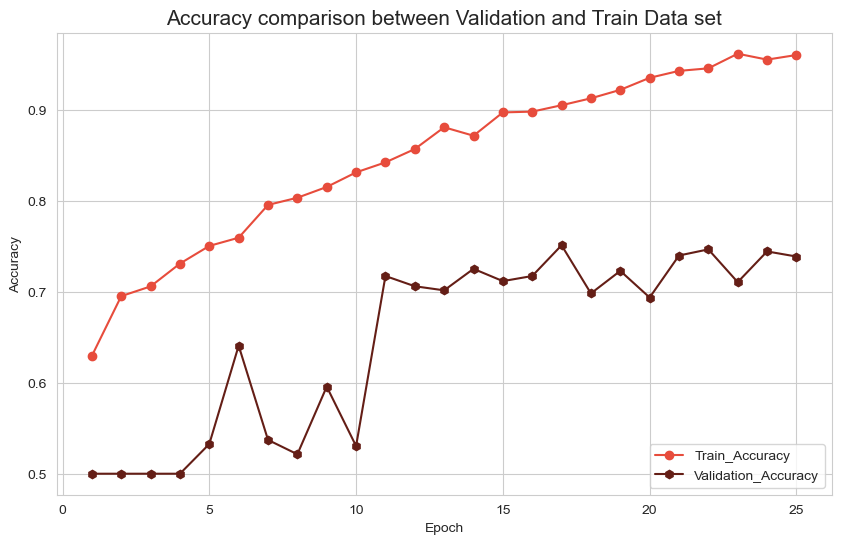

In [25]:
plt.figure(figsize=(10,6))
sn.set_style("whitegrid")
plt.plot(range(1, len(cnn_16.history.history['accuracy'])+1), cnn_16.history.history['accuracy'], color="#E74C3C", marker='o')
plt.plot(range(1, len(cnn_16.history.history['val_accuracy'])+1), cnn_16.history.history['val_accuracy'], color='#641E16', marker='h')
plt.title('Accuracy comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_Accuracy', 'Validation_Accuracy'], loc='lower right')
plt.show()

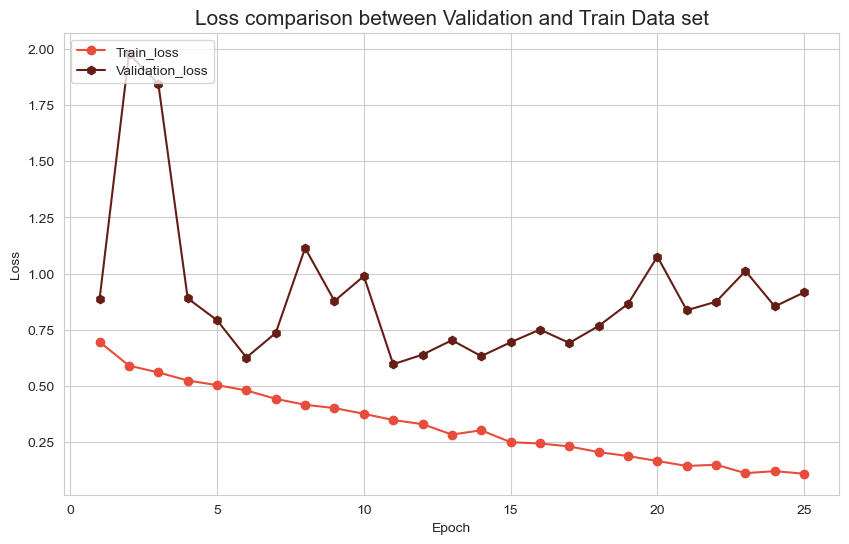

In [26]:
plt.figure(figsize=(10,6))
sn.set_style("whitegrid")
plt.plot(range(1, len(cnn_16.history.history['accuracy'])+1), cnn_16.history.history['loss'], color="#E74C3C", marker='o')
plt.plot(range(1, len(cnn_16.history.history['val_accuracy'])+1), cnn_16.history.history['val_loss'], color='#641E16', marker='h')
plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train_loss', 'Validation_loss'], loc='upper left')
plt.show()

In [73]:
# Assuming best_model is your trained Keras model

# Get the predicted labels from the model
y_pred = cnn_16.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=-1)

# Convert one-hot encoded true labels back to class indices
y_true = np.argmax(test_labels_enc, axis=-1)

# Compute confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_classes)

print("Confusion Matrix:")
print(conf_mat)

# Get the class labels from the LabelEncoder
class_labels = label_encoder.classes_

# Compute classification report
report = classification_report(y_true, y_pred_classes, target_names=class_labels)

print("\nClassification Report:")
print(report)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step
Confusion Matrix:
[[412 145]
 [137 420]]

Classification Report:
              precision    recall  f1-score   support

       false       0.75      0.74      0.75       557
        true       0.74      0.75      0.75       557

    accuracy                           0.75      1114
   macro avg       0.75      0.75      0.75      1114
weighted avg       0.75      0.75      0.75      1114



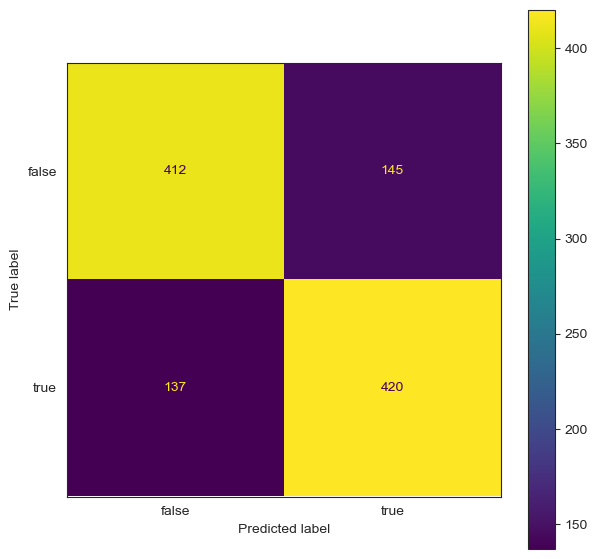

In [74]:
#Confusion matrix

sn.set_style("white")
def plot_confusion_matrix(conf_mat, classes):
    """
    This function prints and plots the confusion matrix.
    """
    fig, ax = plt.subplots(figsize=(7,7)) # change the plot size
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=classes)
    disp = disp.plot(include_values=True,cmap='viridis', ax=ax, xticks_rotation='horizontal')
    plt.show()

# Get your confusion matrix
conf_mat = conf_mat

# Using label_encoder.classes_ guarantees that class_names matches
# the order that was used during the one-hot encoding process
class_names = label_encoder.classes_

# Now plot using the function
plot_confusion_matrix(conf_mat, class_names)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

cnn = Sequential()

# First layer (Grayscale input: (128, 128, 1))
cnn.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(128, 128, 1)))
cnn.add(MaxPooling2D(pool_size=2, strides=2))
cnn.add(Dropout(0.5))

# Second layer
cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
cnn.add(MaxPooling2D(pool_size=2, strides=2))
cnn.add(Dropout(0.5))

# Flatten and Fully Connected Layers
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dense(2, activation='softmax'))  # Change units=2 based on the number of classes

cnn.summary()


c:\Users\Vishnu\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,199,490 (16.02 MB)

 Trainable params: 4,199,490 (16.02 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
train_generator = train_datagen.flow_from_directory(
    'D:/vishnu/disease outbreak/train/train',
    target_size=(128, 128),
    batch_size=32,
    color_mode='grayscale',  # Ensure grayscale images
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    'D:/vishnu/disease outbreak/test/test',
    target_size=(128, 128),
    batch_size=32,
    color_mode='grayscale',  # Ensure grayscale images
    class_mode='categorical'
)


Found 4438 images belonging to 2 classes.
Found 1114 images belonging to 2 classes.


In [38]:
x_batch, y_batch = next(train_generator)
print(x_batch.shape)  # Should be (batch_size, 128, 128, 1)


(32, 128, 128, 1)


In [39]:
print(cnn.input_shape)  # Should be (None, 128, 128, 1)


(None, 128, 128, 1)


In [45]:



train_generator = train_datagen.flow_from_directory(
    'D:/vishnu/disease outbreak/train/train',
    target_size=(128, 128),
    batch_size=32,
    color_mode='grayscale',  # Ensure grayscale images
    class_mode='categorical'
)



Found 4438 images belonging to 2 classes.


In [42]:
import os

train_path = r'D:/vishnu/disease outbreak/train/train'

if os.path.exists(train_path):
    print("✅ Path exists:", train_path)
else:
    print("❌ Path does not exist. Check the folder location.")


✅ Path exists: D:/vishnu/disease outbreak/train/train


In [48]:
train_generator = train_datagen.flow_from_directory(
    train_path,  # ✅ Correct: Use the variable
    target_size=(128, 128),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical'
)


Found 4438 images belonging to 2 classes.


In [49]:

cnn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Fit the model without saving the best model
history = cnn.fit(
    x=train_generator,
    validation_data=val_generator,
    epochs=35,
    callbacks=[early_stopping]  # Only EarlyStopping, no ModelCheckpoint
)


Epoch 1/35
139/139 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.6533 - loss: 0.6298 - val_accuracy: 0.6849 - val_loss: 0.6320
Epoch 2/35
139/139 ━━━━━━━━━━━━━━━━━━━━ 8s 61ms/step - accuracy: 0.6814 - loss: 0.6043 - val_accuracy: 0.6858 - val_loss: 0.6331
Epoch 3/35
139/139 ━━━━━━━━━━━━━━━━━━━━ 22s 158ms/step - accuracy: 0.6663 - loss: 0.6056 - val_accuracy: 0.6912 - val_loss: 0.6211
Epoch 4/35
139/139 ━━━━━━━━━━━━━━━━━━━━ 18s 126ms/step - accuracy: 0.6740 - loss: 0.5877 - val_accuracy: 0.6957 - val_loss: 0.6151
Epoch 5/35
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.6879 - loss: 0.5817 - val_accuracy: 0.6715 - val_loss: 0.6187
Epoch 6/35
139/139 ━━━━━━━━━━━━━━━━━━━━ 12s 84ms/step - accuracy: 0.6880 - loss: 0.5731 - val_accuracy: 0.6535 - val_loss: 0.6372
Epoch 7/35
139/139 ━━━━━━━━━━━━━━━━━━━━ 12s 83ms/step - accuracy: 0.7011 - loss: 0.5566 - val_accuracy: 0.6831 - val_loss: 0.5972
Epoch 8/35
139/139 ━━━━━━━━━━━━━━━━━━━━ 12s 87ms/step - accuracy: 0.7114 - loss: 0.5487 - 

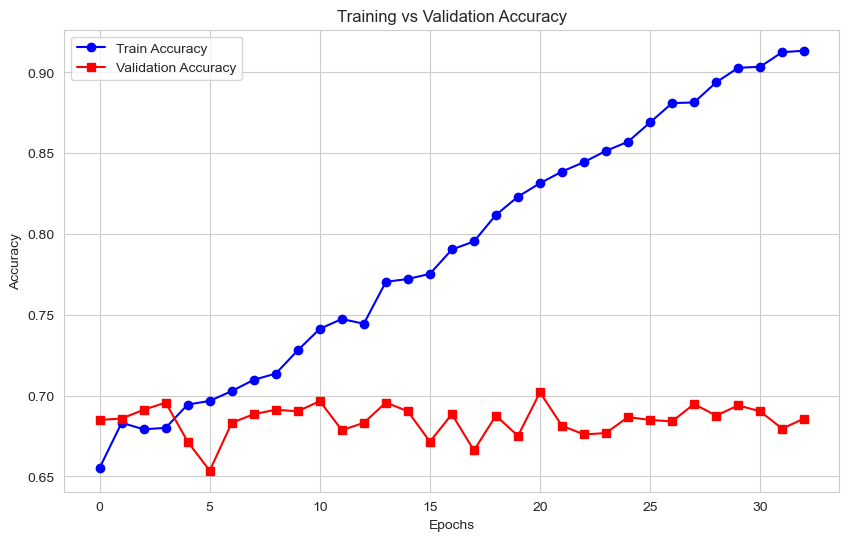

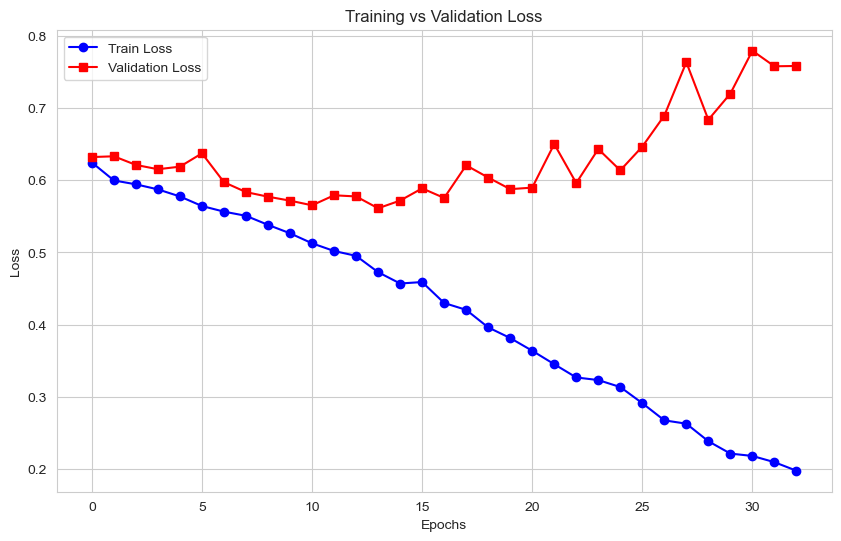

In [50]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

# Plot Loss
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Train Loss', color='blue', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


In [53]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D

# Load the model
best_model = load_model('best_model.h5')

# Modify the first layer to accept grayscale input
input_layer = Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 1))
best_model.layers[0] = input_layer

# Recompile the model
best_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

best_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1024)           │    16,778,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,32

 Total params: 17,832,386 (68.03 MB)

 Trainable params: 17,827,842 (68.01 MB)

 Non-trainable params: 4,544 (17.75 KB)

In [63]:
cnn = tf.keras.models.Sequential()

#---------------------------------------------------------------------------------------------------------#

#layer  >>> add conv layer + batch normalization + add pooling + dropout
# Starting with small kernels
cnn.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same' ,input_shape=(128, 128, 3)))
# Followed by larger kernels
cnn.add(Conv2D(filters=16, kernel_size=(7, 7), activation='relu', padding='same'))
# Including a dilated convolution
cnn.add(Conv2D(filters=16, kernel_size=(3, 3), dilation_rate=2, activation='relu', padding='same'))
cnn.add( BatchNormalization())
cnn.add( MaxPooling2D(pool_size=2, strides=2))
cnn.add( Dropout(0.5) )

# Starting with small kernels
cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
# Followed by larger kernels
cnn.add(Conv2D(filters=32, kernel_size=(7, 7), activation='relu', padding='same'))
# Including a dilated convolution
cnn.add(Conv2D(filters=32, kernel_size=(3, 3), dilation_rate=2, activation='relu', padding='same'))
cnn.add( BatchNormalization())
cnn.add( MaxPooling2D(pool_size=2, strides=2))
cnn.add( Dropout(0.5) )

# Starting with small kernels
cnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
# Followed by larger kernels
cnn.add(Conv2D(filters=32, kernel_size=(7, 7), activation='relu', padding='same'))
# Including a dilated convolution
cnn.add(Conv2D(filters=32, kernel_size=(3, 3), dilation_rate=2, activation='relu', padding='same'))
cnn.add( BatchNormalization())
cnn.add( MaxPooling2D(pool_size=2, strides=2))
cnn.add( Dropout(0.5) )

# Starting with small kernels
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
# Followed by larger kernels
cnn.add(Conv2D(filters=64, kernel_size=(7, 7), activation='relu', padding='same'))
# Including a dilated convolution
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), dilation_rate=2, activation='relu', padding='same'))
cnn.add( BatchNormalization())
cnn.add( MaxPooling2D(pool_size=2, strides=2))
cnn.add( Dropout(0.5) )

# Starting with small kernels
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
# Followed by larger kernels
cnn.add(Conv2D(filters=64, kernel_size=(7, 7), activation='relu', padding='same'))
# Including a dilated convolution
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), dilation_rate=2, activation='relu', padding='same'))
cnn.add( BatchNormalization())
cnn.add( MaxPooling2D(pool_size=2, strides=2))
cnn.add( Dropout(0.5) )

# Starting with small kernels
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
# Followed by larger kernels
cnn.add(Conv2D(filters=128, kernel_size=(7, 7), activation='relu', padding='same'))
# Including a dilated convolution
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), dilation_rate=2, activation='relu', padding='same'))
cnn.add( BatchNormalization())
cnn.add( MaxPooling2D(pool_size=2, strides=2))
cnn.add( Dropout(0.5) )


# Starting with small kernels
cnn.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same'))
# Followed by larger kernels
cnn.add(Conv2D(filters=256, kernel_size=(7, 7), activation='relu', padding='same'))
# Including a dilated convolution
cnn.add(Conv2D(filters=256, kernel_size=(3, 3), dilation_rate=2, activation='relu', padding='same'))
cnn.add( BatchNormalization())
cnn.add( MaxPooling2D(pool_size=1, strides=1))
cnn.add( Dropout(0.5) )



#---------------------------------------------------------------------------------------------------------#

#flattening befor full conection
cnn.add( Flatten() )

#---------------------------------------------------------------------------------------------------------#

# # fully connected layer 1
cnn.add(Dense(1024, activation='relu'))
cnn.add( BatchNormalization())

# # fully connected layer 2
cnn.add(Dense(512, activation='relu'))
cnn.add( BatchNormalization())

# # fully connected layer 3
cnn.add(Dense(256, activation='relu'))
cnn.add( BatchNormalization())

#---------------------------------------------------------------------------------------------------------#

# out put layer at the ent of network
cnn.add( tf.keras.layers.Dense(units=2 , activation='softmax') )

cnn.summary()


c:\Users\Vishnu\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 128, 128, 16)   │        12,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 128, 128, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 128, 128, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 64, 64, 32)     │        50,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 32, 32, 32)     │        50,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 16, 16, 64)     │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 64)       │             

 Total params: 7,515,874 (28.67 MB)

 Trainable params: 7,511,106 (28.65 MB)

 Non-trainable params: 4,768 (18.62 KB)

In [ ]:
# Define the EarlyStopping callback to monitor the validation accuracy
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Monitoring validation accuracy
    patience=12,  # Number of epochs with no improvement after which training will be stopped
    verbose=1,
    mode='max',  # Stops training when the quantity monitored has stopped increasing
    restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored quantity
)


# Define the ModelCheckpoint callback
model_checkpoint = ModelCheckpoint(
    filepath='best_model.h5',  # Path to save the model file
    monitor='val_loss',  # Change to val_loss to monitor the validation loss
    verbose=1,
    save_best_only=True,  # Save only the best model
    mode='min'  # Save the model when the monitored metric has minimized
)


# Compile the model
cnn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Fit the model
history = cnn.fit(
    x=train_generator,
    validation_data=val_generator,
    epochs=35,
    callbacks=[early_stopping , model_checkpoint]  # Add the EarlyStopping callback
)

Epoch 1/35


c:\Users\Vishnu\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 864ms/step - accuracy: 0.4967 - loss: 0.8649
Epoch 1: val_loss improved from inf to 0.69652, saving model to best_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 63s 944ms/step - accuracy: 0.4969 - loss: 0.8636 - val_accuracy: 0.5000 - val_loss: 0.6965
Epoch 2/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 829ms/step - accuracy: 0.5280 - loss: 0.7114
Epoch 2: val_loss did not improve from 0.69652
56/56 ━━━━━━━━━━━━━━━━━━━━ 50s 892ms/step - accuracy: 0.5279 - loss: 0.7113 - val_accuracy: 0.5000 - val_loss: 0.7202
Epoch 3/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 845ms/step - accuracy: 0.5270 - loss: 0.6951
Epoch 3: val_loss did not improve from 0.69652
56/56 ━━━━━━━━━━━━━━━━━━━━ 51s 910ms/step - accuracy: 0.5270 - loss: 0.6951 - val_accuracy: 0.5000 - val_loss: 0.7336
Epoch 4/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 857ms/step - accuracy: 0.5235 - loss: 0.6993
Epoch 4: val_loss did not improve from 0.69652
56/56 ━━━━━━━━━━━━━━━━━━━━ 52s 922ms/step - accuracy: 0.5237 - loss: 0.6993 - val_accuracy: 0.5056 - val_loss: 0.7061
Epoch 5/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 836ms/step - accuracy: 0.5745 - loss: 0.6808
Epoch 5: val_loss did not improve from 0.69

56/56 ━━━━━━━━━━━━━━━━━━━━ 51s 904ms/step - accuracy: 0.6211 - loss: 0.6417 - val_accuracy: 0.6306 - val_loss: 0.6219
Epoch 10/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 54s/step - accuracy: 0.6352 - loss: 0.6420 
Epoch 10: val_loss did not improve from 0.62195
56/56 ━━━━━━━━━━━━━━━━━━━━ 2997s 54s/step - accuracy: 0.6354 - loss: 0.6418 - val_accuracy: 0.6385 - val_loss: 0.6769
Epoch 11/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6552 - loss: 0.6293
Epoch 11: val_loss improved from 0.62195 to 0.58289, saving model to best_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.6553 - loss: 0.6290 - val_accuracy: 0.6858 - val_loss: 0.5829
Epoch 12/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 849ms/step - accuracy: 0.6688 - loss: 0.6048
Epoch 12: val_loss did not improve from 0.58289
56/56 ━━━━━━━━━━━━━━━━━━━━ 51s 916ms/step - accuracy: 0.6689 - loss: 0.6048 - val_accuracy: 0.6700 - val_loss: 0.6195
Epoch 13/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 826ms/step - accuracy: 0.6948 - loss: 0.5795
Epoch 13: val_loss did not improve from 0.58289
56/56 ━━━━━━━━━━━━━━━━━━━━ 50s 890ms/step - accuracy: 0.6944 - loss: 0.5797 - val_accuracy: 0.5901 - val_loss: 0.6832
Epoch 14/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 828ms/step - accuracy: 0.6896 - loss: 0.5811
Epoch 14: val_loss did not improve from 0.58289
56/56 ━━━━━━━━━━━━━━━━━━━━ 50s 892ms/step - accuracy: 0.6896 - loss: 0.5810 - val_accuracy: 0.6824 - val_loss: 0.5946
Epoch 15/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 830ms/step - accuracy: 0.7111 - loss: 0.5600
Epoch 15: val_loss did not improve from

56/56 ━━━━━━━━━━━━━━━━━━━━ 51s 904ms/step - accuracy: 0.7270 - loss: 0.5418 - val_accuracy: 0.7466 - val_loss: 0.5221
Epoch 18/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 833ms/step - accuracy: 0.7389 - loss: 0.5415
Epoch 18: val_loss did not improve from 0.52208
56/56 ━━━━━━━━━━━━━━━━━━━━ 50s 898ms/step - accuracy: 0.7386 - loss: 0.5417 - val_accuracy: 0.7162 - val_loss: 0.5458
Epoch 19/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 827ms/step - accuracy: 0.7369 - loss: 0.5383
Epoch 19: val_loss did not improve from 0.52208
56/56 ━━━━━━━━━━━━━━━━━━━━ 50s 890ms/step - accuracy: 0.7367 - loss: 0.5384 - val_accuracy: 0.6948 - val_loss: 0.5808
Epoch 20/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 850ms/step - accuracy: 0.7257 - loss: 0.5355
Epoch 20: val_loss did not improve from 0.52208
56/56 ━━━━━━━━━━━━━━━━━━━━ 51s 917ms/step - accuracy: 0.7258 - loss: 0.5355 - val_accuracy: 0.7173 - val_loss: 0.5583
Epoch 21/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 838ms/step - accuracy: 0.7513 - loss: 0.5127
Epoch 21: val_loss improved from 0.5

56/56 ━━━━━━━━━━━━━━━━━━━━ 51s 906ms/step - accuracy: 0.7513 - loss: 0.5127 - val_accuracy: 0.7646 - val_loss: 0.4997
Epoch 22/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 842ms/step - accuracy: 0.7529 - loss: 0.5070
Epoch 22: val_loss did not improve from 0.49967
56/56 ━━━━━━━━━━━━━━━━━━━━ 51s 906ms/step - accuracy: 0.7530 - loss: 0.5069 - val_accuracy: 0.7061 - val_loss: 0.5647
Epoch 23/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 832ms/step - accuracy: 0.7568 - loss: 0.4811
Epoch 23: val_loss did not improve from 0.49967
56/56 ━━━━━━━━━━━━━━━━━━━━ 50s 896ms/step - accuracy: 0.7567 - loss: 0.4813 - val_accuracy: 0.7286 - val_loss: 0.5230
Epoch 24/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 835ms/step - accuracy: 0.7778 - loss: 0.4879
Epoch 24: val_loss did not improve from 0.49967
56/56 ━━━━━━━━━━━━━━━━━━━━ 50s 900ms/step - accuracy: 0.7777 - loss: 0.4879 - val_accuracy: 0.6881 - val_loss: 0.6158
Epoch 25/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 834ms/step - accuracy: 0.7804 - loss: 0.4662
Epoch 25: val_loss did not improve f

56/56 ━━━━━━━━━━━━━━━━━━━━ 51s 903ms/step - accuracy: 0.7852 - loss: 0.4573 - val_accuracy: 0.7477 - val_loss: 0.4934
Epoch 30/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 840ms/step - accuracy: 0.7803 - loss: 0.4486
Epoch 30: val_loss did not improve from 0.49337
56/56 ━━━━━━━━━━━━━━━━━━━━ 51s 908ms/step - accuracy: 0.7802 - loss: 0.4488 - val_accuracy: 0.7365 - val_loss: 0.5035
Epoch 31/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 841ms/step - accuracy: 0.7801 - loss: 0.4497
Epoch 31: val_loss improved from 0.49337 to 0.47902, saving model to best_model.h5


56/56 ━━━━━━━━━━━━━━━━━━━━ 51s 910ms/step - accuracy: 0.7801 - loss: 0.4498 - val_accuracy: 0.7658 - val_loss: 0.4790
Epoch 32/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 842ms/step - accuracy: 0.7845 - loss: 0.4486
Epoch 32: val_loss did not improve from 0.47902
56/56 ━━━━━━━━━━━━━━━━━━━━ 51s 906ms/step - accuracy: 0.7845 - loss: 0.4487 - val_accuracy: 0.7432 - val_loss: 0.5340
Epoch 33/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 841ms/step - accuracy: 0.7863 - loss: 0.4539
Epoch 33: val_loss did not improve from 0.47902
56/56 ━━━━━━━━━━━━━━━━━━━━ 51s 905ms/step - accuracy: 0.7863 - loss: 0.4538 - val_accuracy: 0.7466 - val_loss: 0.5054
Epoch 34/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 836ms/step - accuracy: 0.7995 - loss: 0.4292
Epoch 34: val_loss did not improve from 0.47902
56/56 ━━━━━━━━━━━━━━━━━━━━ 50s 901ms/step - accuracy: 0.7993 - loss: 0.4295 - val_accuracy: 0.7669 - val_loss: 0.4802
Epoch 35/35
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 874ms/step - accuracy: 0.7957 - loss: 0.4309
Epoch 35: val_loss improved from 0.4

56/56 ━━━━━━━━━━━━━━━━━━━━ 53s 943ms/step - accuracy: 0.7956 - loss: 0.4310 - val_accuracy: 0.7815 - val_loss: 0.4558
Restoring model weights from the end of the best epoch: 35.


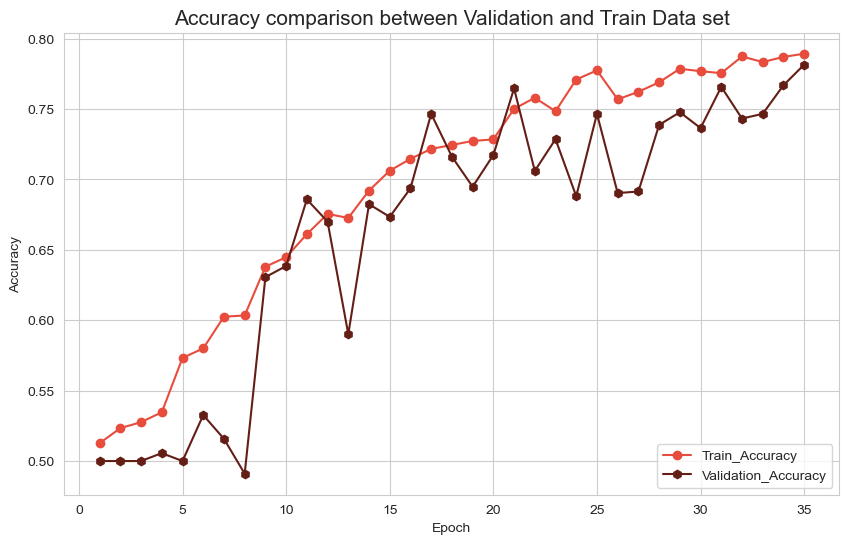

In [65]:
plt.figure(figsize=(10,6))
sn.set_style("whitegrid")
plt.plot(range(1, len(cnn.history.history['accuracy'])+1), cnn.history.history['accuracy'], color="#E74C3C", marker='o')
plt.plot(range(1, len(cnn.history.history['val_accuracy'])+1), cnn.history.history['val_accuracy'], color='#641E16', marker='h')
plt.title('Accuracy comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_Accuracy', 'Validation_Accuracy'], loc='lower right')
plt.show()

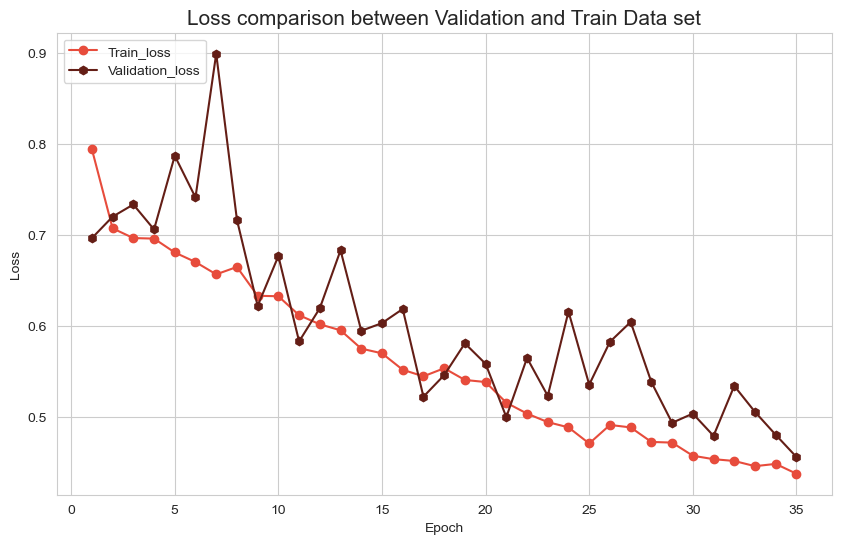

In [66]:
plt.figure(figsize=(10,6))
sn.set_style("whitegrid")
plt.plot(range(1, len(cnn.history.history['accuracy'])+1), cnn.history.history['loss'], color="#E74C3C", marker='o')
plt.plot(range(1, len(cnn.history.history['val_accuracy'])+1), cnn.history.history['val_loss'], color='#641E16', marker='h')
plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train_loss', 'Validation_loss'], loc='upper left')
plt.show()

In [67]:
best_model = load_model('best_model.h5')



# Evaluate the model
train_loss, train_accuracy = best_model.evaluate(train_generator)
val_loss, val_accuracy = best_model.evaluate(val_generator)
test_loss, test_accuracy = best_model.evaluate(test_generator)

print(f"train loss: {train_loss}")
print(f"train accuracy: {train_accuracy}")
print('----'*6)
print(f"val loss: {val_loss}")
print(f"val accuracy: {val_accuracy}")
print('----'*6)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 245ms/step - accuracy: 0.8022 - loss: 0.4144
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 248ms/step - accuracy: 0.7788 - loss: 0.4664
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 246ms/step - accuracy: 0.8044 - loss: 0.4332
train loss: 0.4222966134548187
train accuracy: 0.8008450865745544
------------------------
val loss: 0.45577555894851685
val accuracy: 0.7815315127372742
------------------------
Test loss: 0.4894609749317169
Test accuracy: 0.7800717949867249


In [68]:
# Assuming best_model is your trained Keras model

# Get the predicted labels from the model
y_pred = best_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=-1)

# Convert one-hot encoded true labels back to class indices
y_true = np.argmax(test_labels_enc, axis=-1)

# Compute confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_classes)

print("Confusion Matrix:")
print(conf_mat)

# Get the class labels from the LabelEncoder
class_labels = label_encoder.classes_

# Compute classification report
report = classification_report(y_true, y_pred_classes, target_names=class_labels)

print("\nClassification Report:")
print(report)

18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 274ms/step
Confusion Matrix:
[[457 100]
 [145 412]]

Classification Report:
              precision    recall  f1-score   support

       false       0.76      0.82      0.79       557
        true       0.80      0.74      0.77       557

    accuracy                           0.78      1114
   macro avg       0.78      0.78      0.78      1114
weighted avg       0.78      0.78      0.78      1114



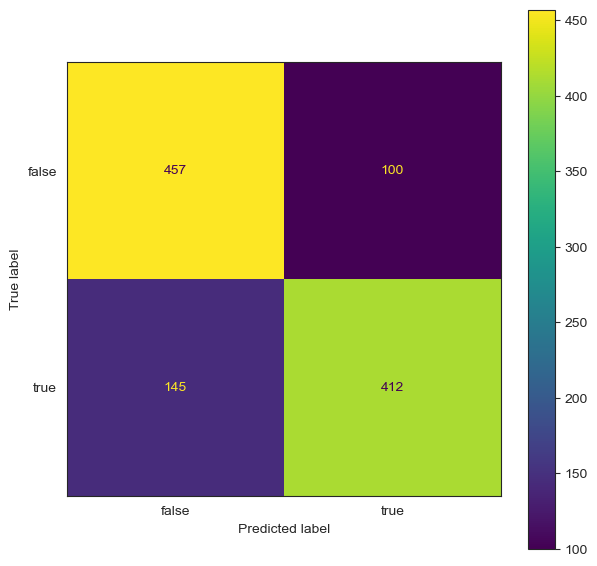

In [69]:
#Confusion matrix

sn.set_style("white")
def plot_confusion_matrix(conf_mat, classes):
    """
    This function prints and plots the confusion matrix.
    """
    fig, ax = plt.subplots(figsize=(7,7)) # change the plot size
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=classes)
    disp = disp.plot(include_values=True,cmap='viridis', ax=ax, xticks_rotation='horizontal')
    plt.show()

# Get your confusion matrix
conf_mat = conf_mat

# Using label_encoder.classes_ guarantees that class_names matches
# the order that was used during the one-hot encoding process
class_names = label_encoder.classes_

# Now plot using the function
plot_confusion_matrix(conf_mat, class_names)

In [70]:
best_model.save("CNN_ model.h5")


In [ ]:
from tensorflow.keras.models import load_model
# Load the trained modela
model = load_model('D:/vishnu/disease outbreak/Saved_models/CNN_ model.h5')

In [72]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 16)   │        12,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 32)     │        50,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │        50,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 64)     │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             

 Total params: 7,515,876 (28.67 MB)

 Trainable params: 7,511,106 (28.65 MB)

 Non-trainable params: 4,768 (18.62 KB)

 Optimizer params: 2 (12.00 B)

In [73]:
import tensorflow as tf


In [74]:
import tensorflow as tf
from tensorflow.keras.models import Model

# Ensure model is built by calling it on a dummy input with the correct shape (128x128)
dummy_input = tf.random.normal([1, 128, 128, 3])  # Match input shape
model(dummy_input)  # This ensures the model is "called" before extracting layers

# Print model summary to check layers
model.summary()

# Extract the correct layer before Dense
intermediate_layer_index = -3  # Adjust based on your model summary
intermediate_model = Model(inputs=model.input, outputs=model.layers[intermediate_layer_index].output)

# Get output from the intermediate model
output = intermediate_model(dummy_input)
print("Shape before Dense:", output.shape)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 16)   │        12,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 32)     │        50,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │        50,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 64)     │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             

 Total params: 7,515,876 (28.67 MB)

 Trainable params: 7,511,106 (28.65 MB)

 Non-trainable params: 4,768 (18.62 KB)

 Optimizer params: 2 (12.00 B)

AttributeError: The layer sequential has never been called and thus has no defined input.

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt

# Class labels (modify based on your dataset)
class_labels = ['normal', 'cardiomegaly']

def detect_cardiomegaly(img_path, model, image_size=224):
    """
    Function to detect Cardiomegaly from a chest X-ray.
    Displays 'Normal' if no disease is detected, otherwise shows 'Cardiomegaly'.
    """
    try:
        # Load and preprocess the image
        img = load_img(img_path, target_size=(image_size, image_size))
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        img_array = preprocess_input(img_array)  # Apply VGG16 preprocessing

        # Make a prediction
        predictions = model.predict(img_array)
        predicted_class_index = np.argmax(predictions, axis=1)[0]
        confidence_score = np.max(predictions, axis=1)[0]

        # Determine the class
        if class_labels[predicted_class_index] == 'normal':
            result = "Normal"
        else:
            result = f"Disease: Cardiomegaly"

        # Display the image with the prediction
        plt.imshow(load_img(img_path))
        plt.axis('off')
        plt.title(f"{result} (Confidence: {confidence_score * 100:.2f}%)")
        plt.show()

    except Exception as e:
        print("Error processing the image:", str(e))


In [ ]:
image_path = 'D:/vishnu/disease outbreak/test/test/false/2.png'  # Provide the path to your new image
detect_cardiomegaly(image_path, model)

Error processing the image: Exception encountered when calling Sequential.call().

Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 1024, but received input with shape (1, 2304)

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 224, 224, 3), dtype=float32)
  • training=False
  • mask=None


In [14]:
from tensorflow.keras.models import load_model

model_path = 'D:/vishnu/disease outbreak/Saved_models/CNN_ model.h5'
model = load_model(model_path)
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 128, 128, 16)   │        12,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 128, 128, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 128, 128, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 64, 64, 32)     │        50,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 32, 32, 32)     │        50,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 16, 16, 64)     │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 64)       │             

 Total params: 7,515,876 (28.67 MB)

 Trainable params: 7,511,106 (28.65 MB)

 Non-trainable params: 4,768 (18.62 KB)

 Optimizer params: 2 (12.00 B)

In [17]:
print(model.input_shape)


(None, 128, 128, 3)


In [13]:
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import os
import matplotlib.pyplot as plt

# Step 1: Load the trained model
model_path = 'D:/vishnu/disease outbreak/Saved_models/CNN_ model.h5'  # Corrected the file name
if not os.path.exists(model_path):
    raise FileNotFoundError(f"Model file not found at {model_path}. Please check the path.")
model = load_model(model_path)


# Ensure test_generator is defined
if 'test_generator' not in locals():
    try:
        # Ensure test_datagen is defined
        if 'test_datagen' not in locals():
            from tensorflow.keras.preprocessing.image import ImageDataGenerator
            test_datagen = ImageDataGenerator(rescale=1./255, featurewise_center=True)
            test_datagen.mean = train_datagen.mean  # Use the mean from train_datagen

        test_generator = test_datagen.flow(
            x=test_array,
            y=test_labels_enc,
            batch_size=64,
            shuffle=False
        )
    except NameError as e:
        raise NameError("test_datagen or train_datagen is not defined. Please ensure the relevant cells are executed.") from e
else:
    print("test_generator is already defined.")

# Generate predictions for the test dataset
test_predictions = model.predict(test_generator)  # Predicted probabilities for each class

# Step 2: Binarize the test labels and predictions for multi-class ROC
train_dir = 'D:/vishnu/disease outbreak/train/train'  # Replace with the correct path to your training directory

test_labels_bin = label_binarize(test_labels_enc.argmax(axis=1), classes=np.arange(len(os.listdir(train_dir))))
test_predictions_bin = test_predictions

# Step 3: Compute ROC curve and ROC AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(len(os.listdir(train_dir))):
    fpr[i], tpr[i], _ = roc_curve(test_labels_bin[:, i], test_predictions_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Step 4: Plot the ROC Curve
plt.figure(figsize=(10, 8))
for i in range(len(os.listdir(train_dir))):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


NameError: test_datagen or train_datagen is not defined. Please ensure the relevant cells are executed.